# Scatter Plot
This scatter plot shows a country’s youth literacy rate explained by their government’s education expenditure (as a % of their GDP). Poverty is often a primary reason for the discrepancy between the number of boys and girls enrolled in school. When families struggle financially, they tend to prioritize boys when sending their children to school [(source)](https://borgenproject.org/top-10-facts-about-girls-education-in-developing-countries/). On top of the scatter plot are two linear regressions; one to explain boys’ literacy rate and one to explain girls’ literacy rate. Based on the two regressions, we can see that both boys and girls benefit from an increase in education expenditure, but girls benefit more than boys – this is shown because the slope is larger on the girl regression. I think this difference in benefit is because when a country is thriving economically, they can spend more on education and families can afford to send both their boys and girls to school. This plot can be used to convince governments that are interested in increasing their literacy rate to invest more in their education system.

### SetUp

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# helper function
def assign_continent(country_code):
    """given a 3 letter country code,
    return the continent the country belongs to"""
    try:
        row = country_to_continent[country_to_continent.Three_Letter_Country_Code == country_code]
        continent = row.Continent_Name.values[0]
        return continent
    except:
        return None

### Pre-Processing
1. Filter Columns
2. Rename Columns
3. Assign each continennt to each country
4. Filter out the non-country level rows

In [3]:
# read in data
country_to_continent = pd.read_csv('../data/country_continent.csv')
literacy_rate = pd.read_csv('../data/youth_literacy_rate.csv')
education_expend = pd.read_csv('../data/govt_education_expenditure_of_GDP.csv')


# 1. filter columns
literacy_rate = literacy_rate[['Indicator', 'LOCATION', 'Country', 'Time', 'Value']]
education_expend = education_expend[['LOCATION','Time', 'Value']]

# 2. rename column
literacy_rate = literacy_rate.replace('Youth literacy rate, population 15-24 years, female (%)', 
                           'Girls')
literacy_rate = literacy_rate.replace('Youth literacy rate, population 15-24 years, male (%)', 
                           'Boys')
education_expend.columns = ['LOCATION','Time', 'Expenditure%']

# 3. Assign each country their continent
literacy_rate['Continent'] = literacy_rate.LOCATION.apply(lambda x: assign_continent(x))

# 4. keep only country level rows
countries = country_to_continent.Three_Letter_Country_Code.unique()
literacy_rate_by_country = literacy_rate[literacy_rate.LOCATION.isin(countries)]

### Calculations

In [4]:
# joining expenditure & litteracy rate
education_expend = education_expend.set_index(["LOCATION", "Time"])
joined = literacy_rate_by_country.join(education_expend, on=["LOCATION", "Time"], how='inner')

joined.head()

,Indicator,LOCATION,Country,Time,Value,Continent,Expenditure%
5,Boys,BGD,Bangladesh,2016,90.90535,Asia,1.53554
300,Girls,BGD,Bangladesh,2016,93.53532,Asia,1.53554
23,Girls,GTM,Guatemala,2014,93.26925,North America,2.94139
315,Boys,GTM,Guatemala,2014,95.48186,North America,2.94139
24,Girls,HND,Honduras,2014,96.29226,North America,7.09012


### Plot

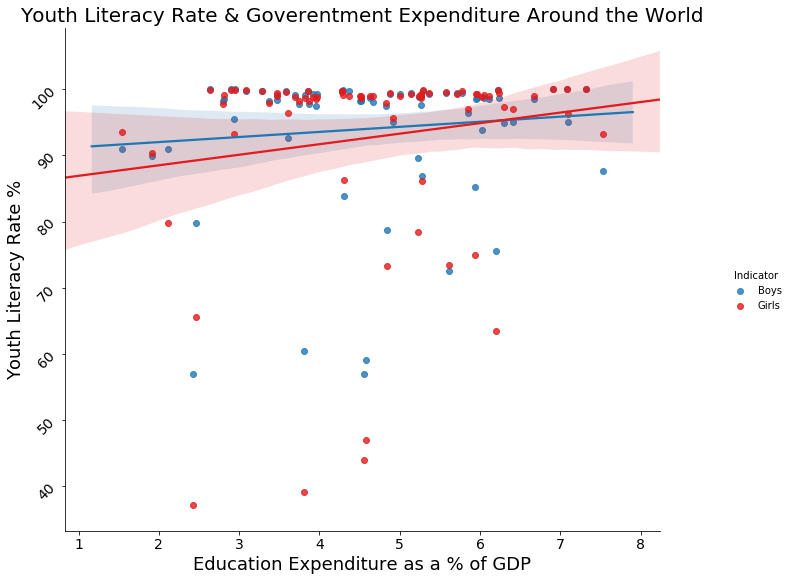

In [5]:
# data
sns.lmplot(y="Value", x="Expenditure%", data=joined,
           hue='Indicator', palette=["#1f78b4", '#e41a1c'],
           truncate=False)

# size 
plt.gcf().set_size_inches(11.7, 8.27)

# title
plt.title(f'Youth Literacy Rate & Goverentment Expenditure Around the World',fontsize=20)

#axis
plt.ylabel('Youth Literacy Rate %', fontsize=18)
plt.xlabel('Education Expenditure as a % of GDP', fontsize=18)
plt.tick_params(axis='y', labelrotation=45)
plt.tick_params(labelsize=14)

# plt.show()
plt.savefig('ScatterPlot')